# Exploración y Preparación de los Datos

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
df = pd.read_csv('casen2013tarapa.csv', sep = ';',encoding = "ISO-8859-1")

print(df.shape)
df.head()

(1379, 18)


,comuna,zona,sexo,edad,ecivil,educ,activ,P1,P2,P3,P4,P5,P6,P7,Y1,Y2,Ytot,Ytot2
0,Iquique,Urbano,Mujer,36,Separado(a),Profesional Completo,Ocupados,S,S,Chilena (exclusivamente),En otra comuna,S,S,N5,1900000,0,1900000,1200000
1,Iquique,Urbano,Mujer,60,Soltero(a),Profesional Completo,Ocupados,S,S,Chilena (exclusivamente),En esta comuna,S,S,N6,741667,0,1091667,700000
2,Iquique,Urbano,Mujer,49,Soltero(a),Profesional Completo,Ocupados,No,No,Chilena (exclusivamente),En esta comuna,S,S,N8,757333,9346,766679,687333
3,Iquique,Urbano,Hombre,37,Casado(a),Profesional Incompleto,Ocupados,S,S,Chilena (exclusivamente),En esta comuna,S,S,N10,2671666,0,3121666,1475000
4,Iquique,Urbano,Mujer,29,Separado(a),M. Hum. Completa,Ocupados,S,S,Chilena (exclusivamente),En esta comuna,S,S,N5,465000,3958,668958,315000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 18 columns):
comuna    1379 non-null object
zona      1379 non-null object
sexo      1379 non-null object
edad      1379 non-null int64
ecivil    1379 non-null object
educ      1379 non-null object
activ     1379 non-null object
P1        1379 non-null object
P2        1379 non-null object
P3        1379 non-null object
P4        1379 non-null object
P5        1379 non-null object
P6        1379 non-null object
P7        1379 non-null object
Y1        1379 non-null int64
Y2        1379 non-null int64
Ytot      1379 non-null int64
Ytot2     1379 non-null int64
dtypes: int64(5), object(13)
memory usage: 194.0+ KB


In [4]:
df.describe()

,edad,Y1,Y2,Ytot,Ytot2
count,1379.000000,1.379000e+03,1379.000000,1.379000e+03,1.379000e+03
mean,44.617839,8.060468e+05,15949.837563,9.681783e+05,5.012769e+05
std,13.401406,8.774141e+05,31560.710918,9.376082e+05,6.060144e+05
min,18.000000,8.330000e+02,0.000000,8.330000e+02,8.330000e+02
25%,35.000000,3.114165e+05,0.000000,4.395000e+05,2.000000e+05
50%,43.000000,5.600000e+05,0.000000,7.050000e+05,3.200000e+05
75%,54.000000,9.546750e+05,16834.500000,1.140000e+06,5.600000e+05
max,97.000000,9.416667e+06,222620.000000,1.011667e+07,6.578333e+06


In [5]:
df.Y1.head()

0    1900000
1     741667
2     757333
3    2671666
4     465000
Name: Y1, dtype: int64

In [6]:
df.columns

Index(['comuna', 'zona', 'sexo', 'edad', 'ecivil', 'educ', 'activ', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'Y1', 'Y2', 'Ytot', 'Ytot2'],
      dtype='object')

# Categorical Encoder

In [7]:
df_cat = pd.get_dummies(df)
df_cat['unos'] = 1
print(df_cat.shape)
df_cat.head()

(1379, 66)


,edad,Y1,Y2,Ytot,Ytot2,comuna_Alto Hospicio,comuna_Camia,comuna_Huara,comuna_Iquique,comuna_Pica,...,P7_N2,P7_N3,P7_N4,P7_N5,P7_N6,P7_N7,P7_N8,P7_N9,P7_NS/NR,unos
0,36,1900000,0,1900000,1200000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,60,741667,0,1091667,700000,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,49,757333,9346,766679,687333,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,37,2671666,0,3121666,1475000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,29,465000,3958,668958,315000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [8]:
print(df_cat.select_dtypes(include=['int64']).columns)
df_cat = df_cat.drop(['Y2', 'Ytot', 'Ytot2'],1)
print(df_cat.columns)

Index(['edad', 'Y1', 'Y2', 'Ytot', 'Ytot2', 'unos'], dtype='object')
Index(['edad', 'Y1', 'comuna_Alto Hospicio', 'comuna_Camia', 'comuna_Huara',
       'comuna_Iquique', 'comuna_Pica', 'comuna_Pozo Almonte', 'zona_Rural',
       'zona_Urbano', 'sexo_Hombre', 'sexo_Mujer', 'ecivil_Anulado(a)',
       'ecivil_Casado(a)', 'ecivil_Conviviente o pareja',
       'ecivil_Divorciado(a)', 'ecivil_Separado(a)', 'ecivil_Soltero(a)',
       'ecivil_Viudo(a)', 'educ_Bsica Compl.', 'educ_Bsica Incom.',
       'educ_M. Hum. Completa', 'educ_M. Hum. Incompleta',
       'educ_M. Tc Completa', 'educ_M. Tc. Prof. Incompleta', 'educ_NS/NR',
       'educ_Postgrado Completo', 'educ_Postgrado Incompleto',
       'educ_Profesional  Incompleto', 'educ_Profesional Completo',
       'educ_Sin Educ. Formal', 'educ_Tcnico Nivel Superior Completo',
       'educ_Tcnico Nivel Superior Incompleta', 'activ_Desocupados',
       'activ_Inactivos', 'activ_Ocupados', 'P1_No', 'P1_S', 'P2_No', 'P2_S',
       'P3_C

In [9]:

predictors = ['edad','comuna_Alto Hospicio',
       'comuna_Camia', 'comuna_Huara', 'comuna_Iquique', 'comuna_Pica',
       'comuna_Pozo Almonte', 'zona_Rural', 'zona_Urbano', 'sexo_Hombre',
       'sexo_Mujer', 'ecivil_Anulado(a)', 'ecivil_Casado(a)',
       'ecivil_Conviviente o pareja', 'ecivil_Divorciado(a)',
       'ecivil_Separado(a)', 'ecivil_Soltero(a)', 'ecivil_Viudo(a)',
       'educ_Bsica Compl.', 'educ_Bsica Incom.', 'educ_M. Hum. Completa',
       'educ_M. Hum. Incompleta', 'educ_M. Tc Completa',
       'educ_M. Tc. Prof. Incompleta', 'educ_NS/NR',
       'educ_Postgrado Completo', 'educ_Postgrado Incompleto',
       'educ_Profesional  Incompleto', 'educ_Profesional Completo',
       'educ_Sin Educ. Formal', 'educ_Tcnico Nivel Superior Completo',
       'educ_Tcnico Nivel Superior Incompleta', 'activ_Desocupados',
       'activ_Inactivos', 'activ_Ocupados', 'P1_No', 'P1_S', 'P2_No', 'P2_S',
       'P3_Chilena (exclusivamente)', 'P3_Chilena y otra (doble nacionalidad)',
       'P3_Otra nacionalidad (extranjeros)', 'P4_En esta comuna',
       'P4_En otra comuna', 'P4_En otro pas', 'P4_No sabe', 'P5_No', 'P5_S',
       'P6_No', 'P6_S', 'P7_N1', 'P7_N10', 'P7_N2', 'P7_N3', 'P7_N4', 'P7_N5',
       'P7_N6', 'P7_N7', 'P7_N8', 'P7_N9', 'P7_NS/NR','unos']

y = df_cat.Y1
X = df_cat[predictors]

# EJERCICIO 1

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =1 )

model = Ridge()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)

print("r2 / variance : ", grid.best_score_)
print("Mean Square Error: " +  str(1/len(X_test)*np.sum((grid.predict(X_test) - y_test) ** 2)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


r2 / variance :  0.31710688861790115
Mean Square Error: 663482294919.599


# Ejercicio 2

In [13]:
target = []
for row in df_cat.Y1:
    if row < 200000:
        target.append(1)
    else:
        target.append(0)

df_cat['sub200'] = target

In [14]:
predictors = ['edad','comuna_Alto Hospicio',
       'comuna_Camia', 'comuna_Huara', 'comuna_Iquique', 'comuna_Pica',
       'comuna_Pozo Almonte', 'zona_Rural', 'zona_Urbano', 'sexo_Hombre',
       'sexo_Mujer', 'ecivil_Anulado(a)', 'ecivil_Casado(a)',
       'ecivil_Conviviente o pareja', 'ecivil_Divorciado(a)',
       'ecivil_Separado(a)', 'ecivil_Soltero(a)', 'ecivil_Viudo(a)',
       'educ_Bsica Compl.', 'educ_Bsica Incom.', 'educ_M. Hum. Completa',
       'educ_M. Hum. Incompleta', 'educ_M. Tc Completa',
       'educ_M. Tc. Prof. Incompleta', 'educ_NS/NR',
       'educ_Postgrado Completo', 'educ_Postgrado Incompleto',
       'educ_Profesional  Incompleto', 'educ_Profesional Completo',
       'educ_Sin Educ. Formal', 'educ_Tcnico Nivel Superior Completo',
       'educ_Tcnico Nivel Superior Incompleta', 'activ_Desocupados',
       'activ_Inactivos', 'activ_Ocupados', 'P1_No', 'P1_S', 'P2_No', 'P2_S',
       'P3_Chilena (exclusivamente)', 'P3_Chilena y otra (doble nacionalidad)',
       'P3_Otra nacionalidad (extranjeros)', 'P4_En esta comuna',
       'P4_En otra comuna', 'P4_En otro pas', 'P4_No sabe', 'P5_No', 'P5_S',
       'P6_No', 'P6_S', 'P7_N1', 'P7_N10', 'P7_N2', 'P7_N3', 'P7_N4', 'P7_N5',
       'P7_N6', 'P7_N7', 'P7_N8', 'P7_N9', 'P7_NS/NR','unos']

y = df_cat.sub200
X = df_cat[predictors]

In [15]:
print(X.shape)
print(y.shape)

(1379, 62)
(1379,)


In [16]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)

(1034, 62)
(345, 62)


In [17]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

# Returns a NumPy Array
# Predict for One Observation (image)
# logisticRegr.predict(x_test[0].reshape(1,-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
logisticRegr.predict(x_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
predictions = logisticRegr.predict(x_test)

In [20]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9130434782608695


In [21]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score
y_true = y_test
y_pred = predictions

print(f1_score(y_true, y_pred, average='macro'))  

print(f1_score(y_true, y_pred, average='micro')) 

print(f1_score(y_true, y_pred, average='weighted'))

print(f1_score(y_true, y_pred, average=None))

precision, recall, fscore, support = score(y_true, y_pred)

print(precision,recall,fscore,support)


0.5822570229254117
0.9130434782608695
0.8893389114290127
[0.95398773 0.21052632]
[0.92284866 0.5       ] [0.98730159 0.13333333] [0.95398773 0.21052632] [315  30]


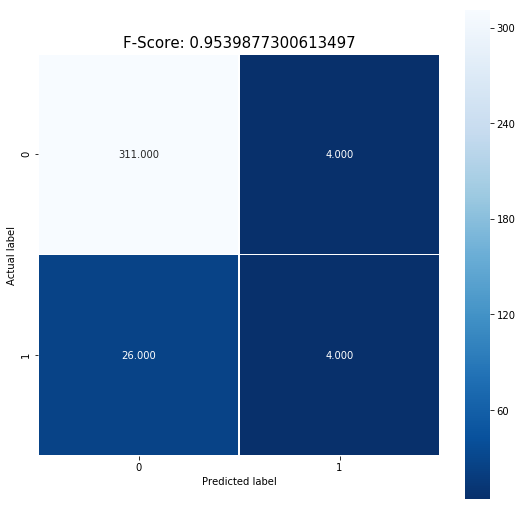

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'F-Score: {0}'.format(fscore[0])
plt.title(all_sample_title, size = 15);
plt.savefig('foo.png')